Importing all nescessary packages.

In [13]:
import pandas as pd
import tensorflow as tp
import numpy as np
import matplotlib as plt
import seaborn as sns


Downloading & Printing the dataset

In [2]:
url = 'https://raw.githubusercontent.com/MilanBinsMathew/Software-Defect-Prediction-JM1/main/jm1_csv.csv'

In [3]:
df = pd.read_csv(url)
print(df.head())


     loc  v(g)  ev(g)  iv(g)  ...  total_Op  total_Opnd  branchCount  defects
0    1.1   1.4    1.4    1.4  ...       1.2         1.2          1.4        0
1    1.0   1.0    1.0    1.0  ...       1.0         1.0          1.0        1
2   72.0   7.0    1.0    6.0  ...     112.0        86.0         13.0        1
3  190.0   3.0    1.0    3.0  ...     329.0       271.0          5.0        1
4   37.0   4.0    1.0    4.0  ...      76.0        50.0          7.0        1

[5 rows x 22 columns]


Shuffling the dataset.
Segementation into training and test set (80% - 20%)
Normalizing the values

In [4]:
df = df.sample(frac = 1)
rng = np.random.RandomState()
df = df.head(1000)
train = df.sample(frac=0.8, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

train_X = train.drop('defects',axis=1).values 
train_Y = train['defects'].values


test_X = test.drop('defects',axis=1).values
test_Y = test['defects'].values



Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X.astype(np.float)) 
test_X = scaler.fit_transform(test_X.astype(float)) 

Keras Model Definition

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

In [7]:
model = Sequential()
model.add(Dense(21,activation = 'relu'))
model.add(Dense(42,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss='binary_crossentropy')

Training

In [8]:
model.fit(x = train_X, y = train_Y, validation_data =(test_X,test_Y), batch_size = 64, epochs=250)
model.summary()

Epoch 1/250
13/13 [==============================] - 1s 18ms/step - loss: 0.6926 - val_loss: 0.6770
Epoch 2/250
13/13 [==============================] - 0s 5ms/step - loss: 0.6692 - val_loss: 0.6566
Epoch 3/250
13/13 [==============================] - 0s 3ms/step - loss: 0.6475 - val_loss: 0.6316
Epoch 4/250
13/13 [==============================] - 0s 3ms/step - loss: 0.6133 - val_loss: 0.5915
Epoch 5/250
13/13 [==============================] - 0s 3ms/step - loss: 0.5631 - val_loss: 0.5374
Epoch 6/250
13/13 [==============================] - 0s 5ms/step - loss: 0.5138 - val_loss: 0.4994
Epoch 7/250
13/13 [==============================] - 0s 5ms/step - loss: 0.4892 - val_loss: 0.4856
Epoch 8/250
13/13 [==============================] - 0s 3ms/step - loss: 0.4829 - val_loss: 0.4782
Epoch 9/250
13/13 [==============================] - 0s 4ms/step - loss: 0.4765 - val_loss: 0.4710
Epoch 10/250
13/13 [==============================] - 0s 3ms/step - loss: 0.4728 - val_loss: 0.4686
Epoch 11

Results

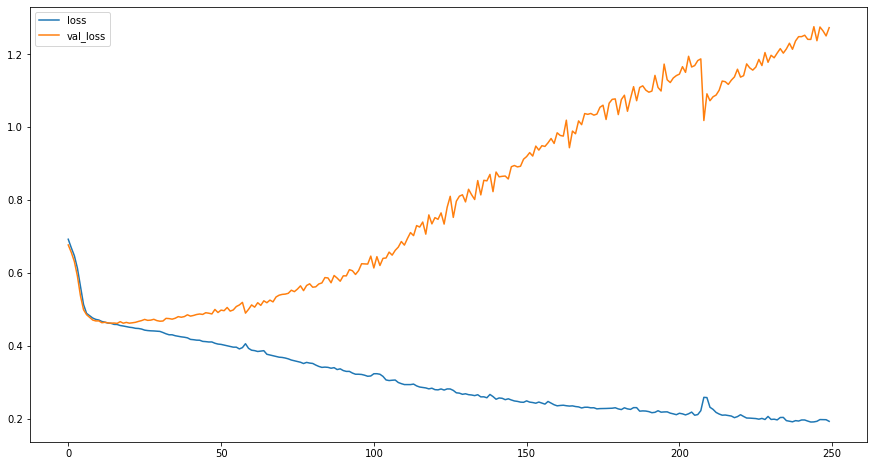

In [9]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(15,8))

MAE: 0.23311883619240079
MSE: 0.17955462673350087
RMSE: 0.4237388662059463
VarScore: -0.13732672188783668


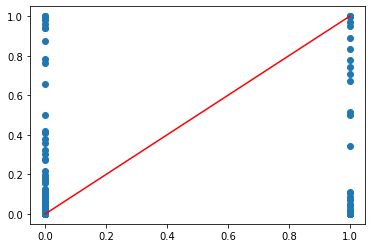

In [10]:
y_pred = model.predict(test_X)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_Y, y_pred))  
print('MSE:', metrics.mean_squared_error(test_Y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_Y, y_pred)))

print('VarScore:',metrics.explained_variance_score(test_Y,y_pred))

fig = plt.pyplot.plot(figsize=(10,5))
plt.pyplot.scatter(test_Y,y_pred)

plt.pyplot.plot(test_Y,test_Y,'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


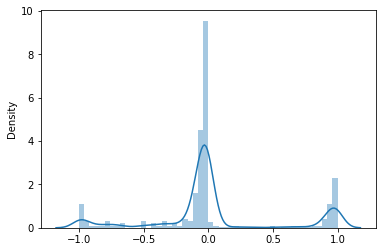

In [14]:
fig  = plt.pyplot.plot(figsize=(12,5))
residuals = (test_Y-y_pred)
sns.distplot(residuals)